## Focusing on terse `FeatNets` training/eval
9.28.2020

In [1]:
import os, sys
import copy as copyroot
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
from fastai2.basics import *
from fastai2.vision.all import *
%load_ext autoreload
%autoreload 2

from module.mnist_helpers import build_df, eda_fig_1, build_dls
from module.mnist_models import FeatsNet
from module.mnist_metrics import metrics_df

In [4]:
dls_tl = build_dls(target='topleft')
dls_cr = build_dls(target='center')

#### pix + pts12

In [6]:
EPOCHS = 20
TMP_FN = 'assets/tmp.csv'

featsnet  = FeatsNet(feats=['pix', 'pts12'])
tmplogger = CSVLogger(fname=TMP_FN)
learn     = Learner(dls_tl, featsnet, loss_func=MSELossFlat(), 
                    cbs=[tmplogger])

with learn.no_logging(): learn.fit(EPOCHS)

In [7]:
history = pd.read_csv(TMP_FN)
display(history.iloc[:2,:]); display(history.iloc[-2:,:])

,epoch,train_loss,valid_loss,time
0,0,0.087510,0.039159,00:02
1,1,0.065605,0.037618,00:02


,epoch,train_loss,valid_loss,time
18,18,0.011964,0.014814,00:02
19,19,0.011290,0.013864,00:02


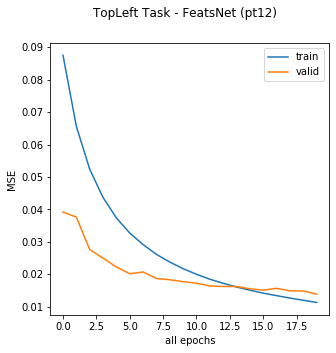

In [13]:
baseline_err = None

fig, ax = plt.subplots(1,1,figsize=(5,5))
legend = ['train','valid']
if baseline_err is not None: legend += ['baseline err']

ax.plot(history['train_loss'])
ax.plot(history['valid_loss'])
if baseline_err is not None:
    ax.hlines(baseline_err, *ax.get_xlim(), linestyle='--')
ax.legend(legend);
ax.set_xlabel('all epochs'); ax.set_ylabel('MSE')
fig.suptitle('TopLeft Task - FeatsNet (pt12)');

In [16]:
df1 = metrics_df(learn, 'FeatsNet1.12', 'feats=pix, pts12', 'topleft')
df1

,model,details,target,split,mse,mae,r2,dist_avg,dist_r2,sqdist_avg,sqdist_r2
0,FeatsNet1.12,"feats=pix, pts12",topleft,valid,0.013864,0.076977,0.559834,0.128998,0.402892,0.027728,0.566138
1,FeatsNet1.12,"feats=pix, pts12",topleft,train,0.008179,0.062497,0.765305,0.102778,0.563008,0.016357,0.784671


In [ ]:
EPOCHS = 20
TMP_FN = 'assets/tmp.csv'

featsnet  = FeatsNet(feats=['pix', 'pts12'])
tmplogger = CSVLogger(fname=TMP_FN)
learn     = Learner(dls_cr, featsnet, loss_func=MSELossFlat(), 
                    cbs=[tmplogger])

with learn.no_logging(): learn.fit(EPOCHS)

history = pd.read_csv(TMP_FN)
display(history.iloc[:2,:]); display(history.iloc[-2:,:])

baseline_err = None

fig, ax = plt.subplots(1,1,figsize=(5,5))
legend = ['train','valid']
if baseline_err is not None: legend += ['baseline err']

ax.plot(history['train_loss'])
ax.plot(history['valid_loss'])
if baseline_err is not None:
    ax.hlines(baseline_err, *ax.get_xlim(), linestyle='--')
ax.legend(legend);
ax.set_xlabel('all epochs'); ax.set_ylabel('MSE')
ax.set_ylim(0, ax.get_ylim()[1])
fig.suptitle('Center Task - FeatsNet (pt12)');

In [19]:
df2 = metrics_df(learn, 'FeatsNet1.12', 'feats=pix, pts12', 'center')
df2

,model,details,target,split,mse,mae,r2,dist_avg,dist_r2,sqdist_avg,sqdist_r2
0,FeatsNet1.12,"feats=pix, pts12",center,valid,0.001491,0.028907,0.694991,0.045425,0.548887,0.002982,0.759506
1,FeatsNet1.12,"feats=pix, pts12",center,train,0.000774,0.022229,0.864319,0.034790,0.666842,0.001547,0.882532


#### topleft | pix +  pts11

,epoch,train_loss,valid_loss,time
0,0,0.007179,0.005112,00:02
1,1,0.005099,0.003562,00:02


,epoch,train_loss,valid_loss,time
18,18,0.00102,0.001742,00:02
19,19,0.00098,0.001616,00:02


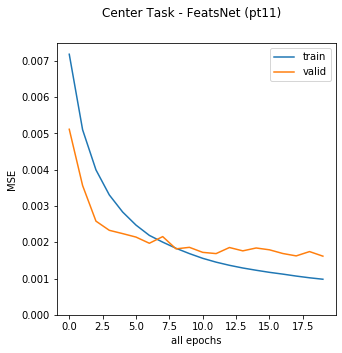

In [23]:
EPOCHS = 20
TMP_FN = 'assets/tmp.csv'

featsnet  = FeatsNet(feats=['pix', 'pts11'])
tmplogger = CSVLogger(fname=TMP_FN)
learn     = Learner(dls_cr, featsnet, loss_func=MSELossFlat(), 
                    cbs=[tmplogger])

with learn.no_logging(): learn.fit(EPOCHS)

history = pd.read_csv(TMP_FN)
display(history.iloc[:2,:]); display(history.iloc[-2:,:])

baseline_err = None

fig, ax = plt.subplots(1,1,figsize=(5,5))
legend = ['train','valid']
if baseline_err is not None: legend += ['baseline err']

ax.plot(history['train_loss'])
ax.plot(history['valid_loss'])
if baseline_err is not None:
    ax.hlines(baseline_err, *ax.get_xlim(), linestyle='--')
ax.legend(legend);
ax.set_xlabel('all epochs'); ax.set_ylabel('MSE')
ax.set_ylim(0, ax.get_ylim()[1])
fig.suptitle('Center Task - FeatsNet (pt11)');

#### center | pix +  pts11

,epoch,train_loss,valid_loss,time
0,0,0.007179,0.005112,00:02
1,1,0.005099,0.003562,00:02


,epoch,train_loss,valid_loss,time
18,18,0.00102,0.001742,00:02
19,19,0.00098,0.001616,00:02


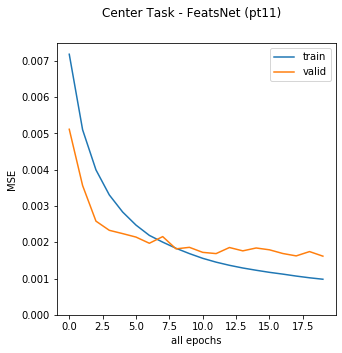

In [23]:
EPOCHS = 20
TMP_FN = 'assets/tmp.csv'

featsnet  = FeatsNet(feats=['pix', 'pts11'])
tmplogger = CSVLogger(fname=TMP_FN)
learn     = Learner(dls_cr, featsnet, loss_func=MSELossFlat(), 
                    cbs=[tmplogger])

with learn.no_logging(): learn.fit(EPOCHS)

history = pd.read_csv(TMP_FN)
display(history.iloc[:2,:]); display(history.iloc[-2:,:])

baseline_err = None

fig, ax = plt.subplots(1,1,figsize=(5,5))
legend = ['train','valid']
if baseline_err is not None: legend += ['baseline err']

ax.plot(history['train_loss'])
ax.plot(history['valid_loss'])
if baseline_err is not None:
    ax.hlines(baseline_err, *ax.get_xlim(), linestyle='--')
ax.legend(legend);
ax.set_xlabel('all epochs'); ax.set_ylabel('MSE')
ax.set_ylim(0, ax.get_ylim()[1])
fig.suptitle('Center Task - FeatsNet (pt11)');

In [ ]:
df4 = metrics_df(learn, 'FeatsNet1.12', 'feats=pix, pts11', 'center')
df4

In [20]:
df = pd.concat((df1, df2))
df

,model,details,target,split,mse,mae,r2,dist_avg,dist_r2,sqdist_avg,sqdist_r2
0,FeatsNet1.12,"feats=pix, pts12",topleft,valid,0.013864,0.076977,0.559834,0.128998,0.402892,0.027728,0.566138
1,FeatsNet1.12,"feats=pix, pts12",topleft,train,0.008179,0.062497,0.765305,0.102778,0.563008,0.016357,0.784671
0,FeatsNet1.12,"feats=pix, pts12",center,valid,0.001491,0.028907,0.694991,0.045425,0.548887,0.002982,0.759506
1,FeatsNet1.12,"feats=pix, pts12",center,train,0.000774,0.022229,0.864319,0.034790,0.666842,0.001547,0.882532
